<a href="https://colab.research.google.com/github/hecjhern/Procesamiento-de-Datos/blob/main/Clase_Analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de datos

La clase pasada vimos los pasos básicos necesarios para la limpieza de datos. Como mencionabamos, estos pasos no son necesario llevarlos a cabo en orden. 



*   Remover los datos inecesarios
*   Remover los duplicados
* Arreglar errores de estructura
* Decidir que hacer con los datos nulos
* Hacer un filtro de Outliers
* Hacer una validación de los datos

En primera instancia vamos a seguir estos pasos tomando en cuenta que tenemos un conocimiento general de los datos con los que estamos trabajando. 


Despues utilizaremos herramientas de aprendizaje de máquina no supervisado para tipos de datos que no se tiene conocimiento previo.



Como en el ejemplo pasado, es necesario que conectemos nuestra carpeta de Drive hayamos descargado previamente las bases de datos con las que queremos trabajar.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importando librerías necesarias

La práctica pasada solo mencionamos que existen algunas librerías que nos van a ayudar en el proceso de limpieza de datos. 

`numpy`: Esta librería de python es básica para cualquier tipo de computación matemática que podamos ocupar. (objeto de matriz multidimensional, varios objetos derivados (como matrices y matrices enmascaradas) y una variedad de rutinas para operaciones rápidas en matrices, incluidas operaciones matemáticas, lógicas, manipulación de formas, clasificación, selección, E/S, transformadas discretas de Fourier, álgebra lineal básica , operaciones estadísticas básicas, simulación aleatoria).

* [Página web](https://numpy.org/doc/stable/user/whatisnumpy.html)
* [Ejemplos](https://cs231n.github.io/python-numpy-tutorial/)

`pandas`: Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos.

* [Página web](https://pandas.pydata.org/docs/user_guide/10min.html)
* [Ejemplos](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)


Herramientas de visualización (`matplotlib`, `seaborn`, `plotly`): 

* [Pagina web matplotlib](https://matplotlib.org/)
* [Pagina web seaborn](https://seaborn.pydata.org/)
* [Pagina web plotly](https://plotly.com/python/)
* [Ejemplos](https://www.python-graph-gallery.com/)



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
import os


## Cargar los data sets

Para esta práctica podemos seguir trabajando con los datasets que trabajamos la clase pasada, agregando los siguientes como ejemplos de análisis exploratorio para datos no conocidos:



In [3]:
diabetes=pd.read_csv('/content/drive/MyDrive/Procesamiento de Datos/diabetes.csv')

## Exploración descriptiva

Como comentabamos la clase pasada, el primer paso de el analisis de datos es determinar cual es el objetivo principal. Ya que tneemos esto en mente empezamos a recolectar la información que nos ayudará a construir un modelo, pero antes de poder iniciar con la construcción del modelo o calculo importante de las variables, tenemos que realizar una exploración descriptiva.

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Veamos ahora el tipo de datos que contiene cada columna. Esto puede ayudarnos a revisar si existe alguna inconsistencia en cuanto a alguna variable numerica que se este tomando en cuenta como un valor de texto o viceversa. 

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.shape

(768, 9)

In [7]:
diabetes.isna().sum().sort_values()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Print the name of columns

In [8]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Check for NULL Values

In [9]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Check unique values

In [10]:
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

#### Check for Duplicate values

In [11]:
diabetes.duplicated().sum()

0

No duplicate values present.

#### Make a copy of the dataset

In [12]:
df = diabetes.copy()

In [13]:
df.shape

(768, 9)

#### Drop NULL values

In [14]:
df=df.dropna()
df.shape

(768, 9)

#### Print first 10 values

In [15]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Data Visualization

### Type: Movie and TV Shows

Text(0.5, 1.0, 'Skin Thickness')

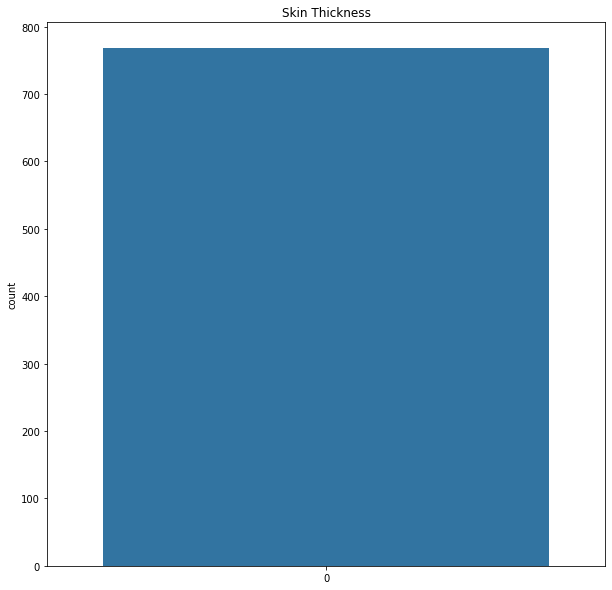

In [22]:
sns.countplot(diabetes['BMI'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Skin Thickness')

### Rating of shows and movies

Text(0.5, 1.0, 'Pregnancies')

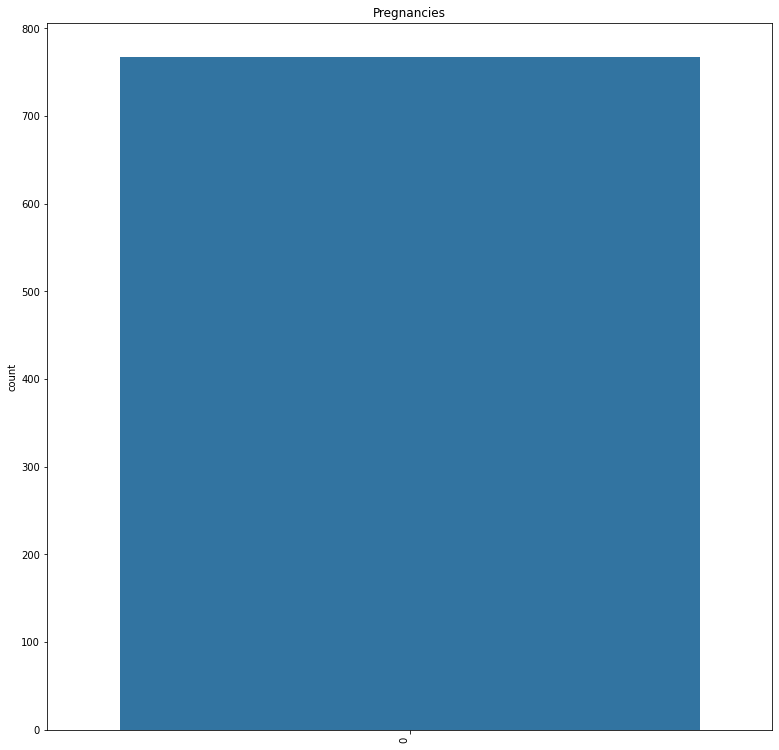

In [18]:
sns.countplot(diabetes['Pregnancies'])
sns.countplot(diabetes['Pregnancies']).set_xticklabels(sns.countplot(diabetes['Pregnancies']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Pregnancies')

### Relation between Type and Rating

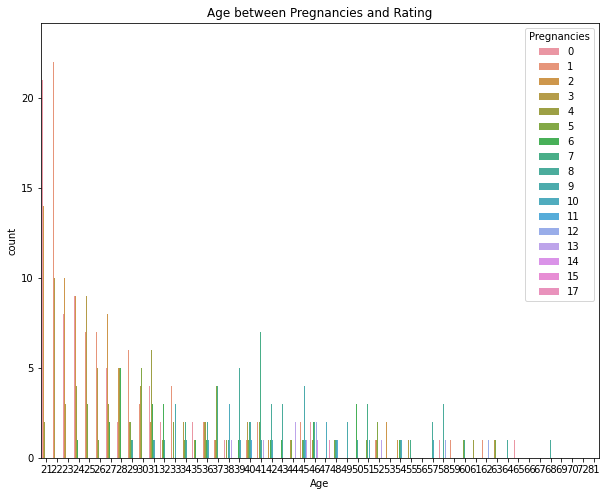

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x='Age',hue='Pregnancies',data=diabetes)
plt.title('Age between Pregnancies and Rating')
plt.show()

### Pie-chart for the Type: Movie and TV Shows

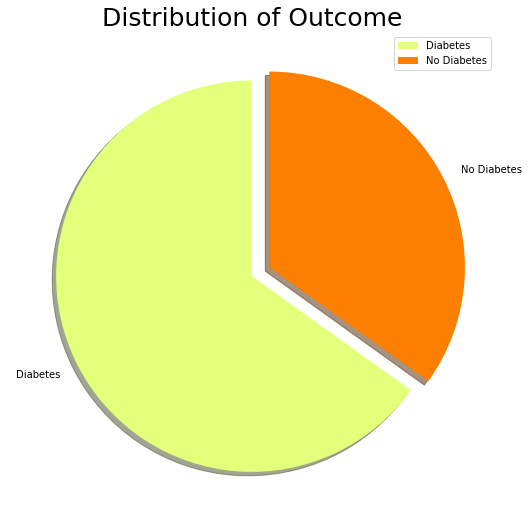

In [23]:
labels = ['Diabetes', 'No Diabetes']
size = diabetes['Outcome'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Outcome', fontsize = 25)
plt.legend()
plt.show()

### Pie-chart for Rating

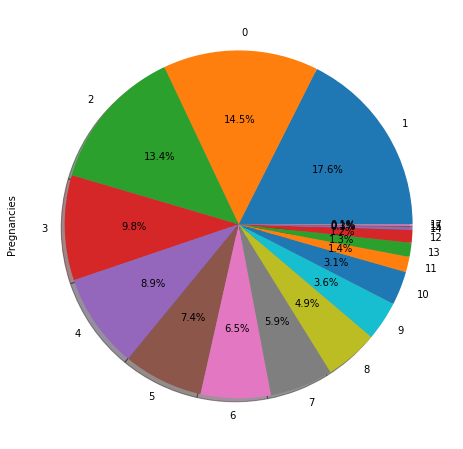

In [24]:
diabetes['Pregnancies'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()